In [1]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
import pickle

In [2]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving TnS main.csv to TnS main.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['TnS main.csv']))

In [5]:

X = df.drop(columns=["PCOS"])
X.head()

,Age( in years),BMI,Gene,Exercise,Miscarriage,Acne,Hair Thinning,Weight gain,Pelvic Pain,Excessive Hair,Mood Swings,Anxiety,Darkening of skin,Depression,Irregular Periods,Food
0,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,0,0,2,0,0,1,0,0,0,0,0,0,1,1
2,3,3,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [6]:

y = df["PCOS"].values

In [7]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=13)

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = lr.predict(X_test)
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Logistic Regression model accuracy(in %): 63.63636363636363


In [10]:
average_accuracy = 0
max = 0
for var in range(0,101):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=var)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)*100
    if (max < score):
        max = score
    average_accuracy += score


In [11]:
print(average_accuracy/101)
print (max)


77.61776177617774
93.93939393939394


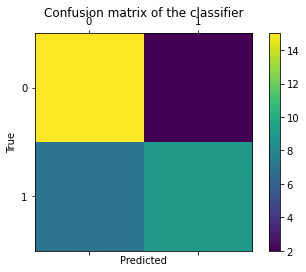

In [12]:
#Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix of the classifier') 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

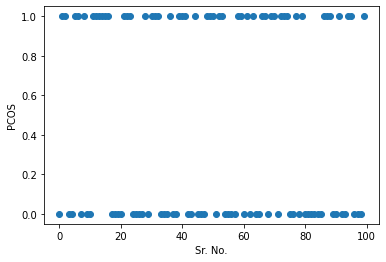

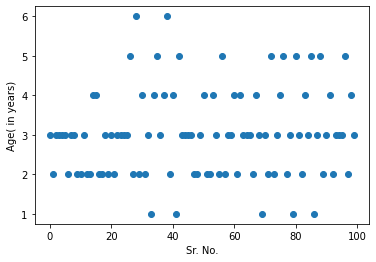

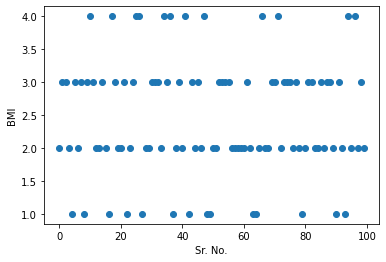

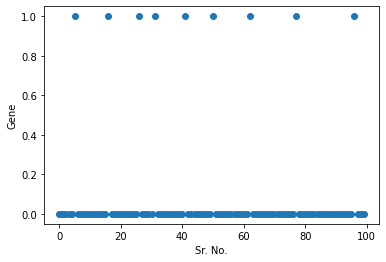

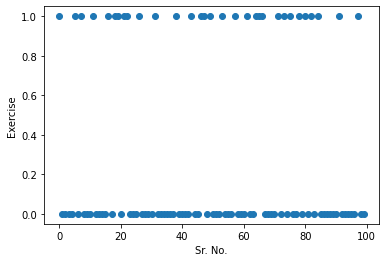

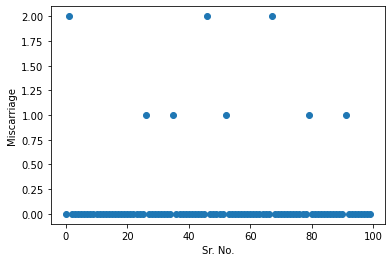

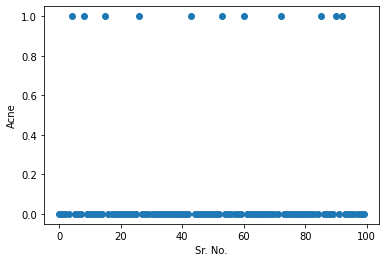

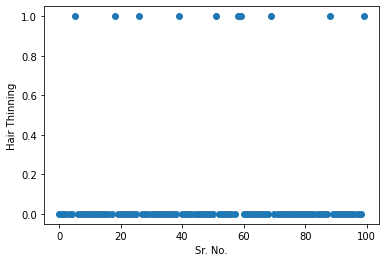

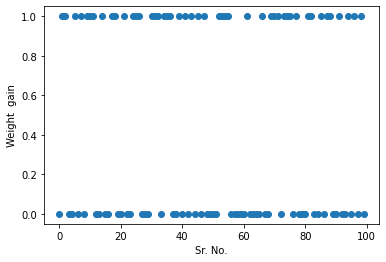

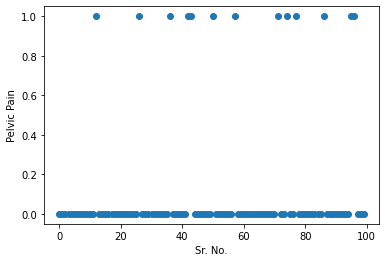

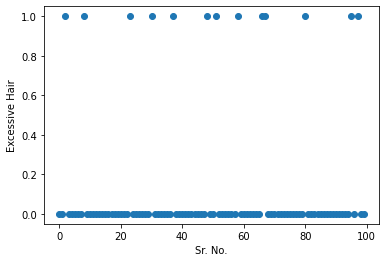

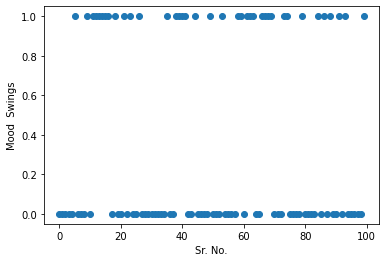

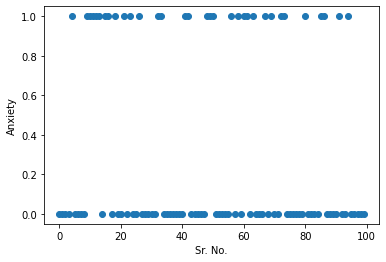

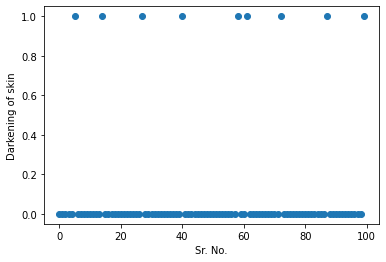

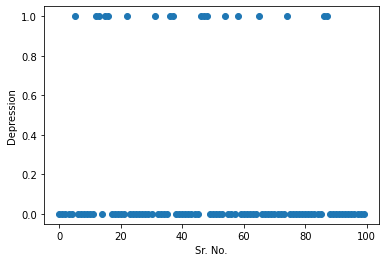

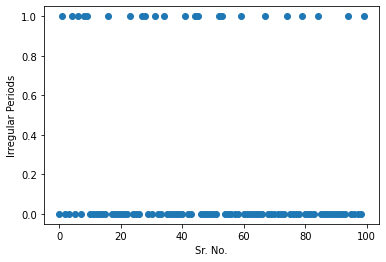

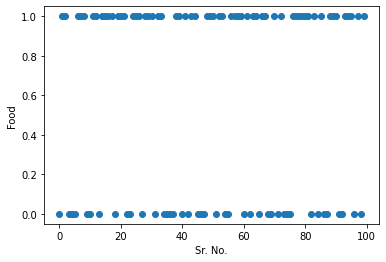

In [13]:
cols = list(df.columns)

for col in cols:    
    if(col.strip()[-5:]) != "(Y/N)":
        plt.scatter([var for var in range(len(df[col]))], df[col])
        plt.xlabel('Sr. No.')
        plt.ylabel(col)
        plt.show()

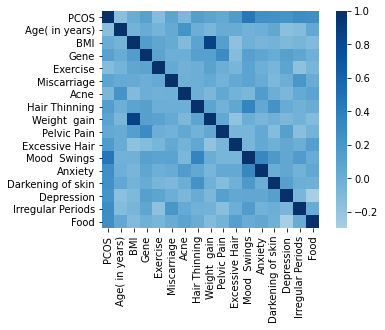

In [15]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,cmap="Blues", center=0, square=True)

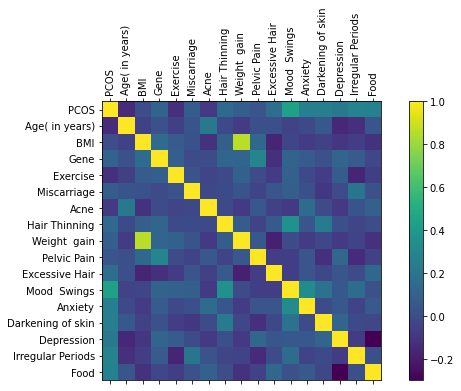

In [17]:
#Plotting Correlation Matrix
f = plt.figure(figsize=(10, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)